# Loan Application Status Prediction<br><br>

**Problem Statement:**<br>
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. <br><br>

**Independent Variables:**<br>

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

**Dependent Variable (Target Variable):**<br>

- Loan_Status<br><br>

In this problem, we are using Machine Learning Algorithms to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
df=pd.read_csv("loan_dataset")

### Exploratory Data Analysis

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


This shows the first five rows of the dataset.

In [4]:
df.shape

(614, 13)

There are 614 rows and 13 columns in the dataset.

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

We can see all the column names in the dataset.



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


This describes the information of the the columns of the dataset. It shows the column names, count and datatype. We can see that there are some missing values.

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can see that there are null values in 'Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term' and 'Credit_History' columns.

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


We can see the statistical distribution of the data here. This shows the description of numerical value only.

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>,
        <AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

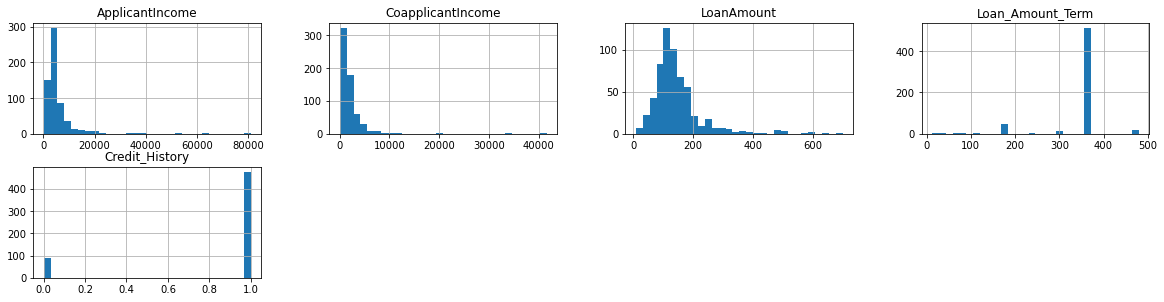

In [9]:
df.hist(figsize=(20,10), grid=True, layout=(4, 4), bins = 30)

**Correlation**

In [9]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


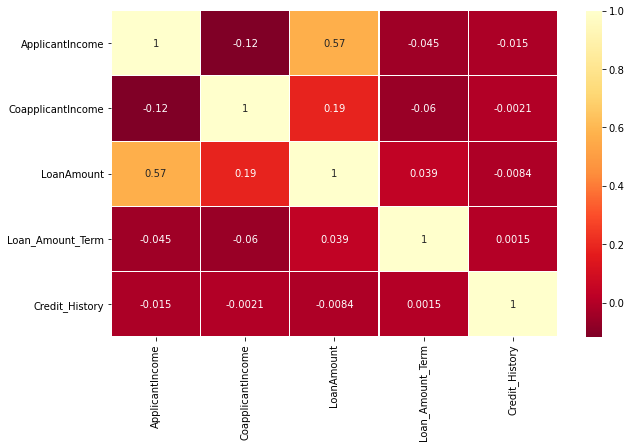

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlOrRd_r", annot=True)
plt.yticks(rotation=0);

### Handling Missing Values

---> Categorical Variables

In [11]:
# Handling Missing Values in Gender
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

# Handling Missing Values in Married
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

# Handling Missing Values in Dependents
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

# Handling Missing Values in Credit_History
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

# Handling Missing Values in Self_Employed
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

---> Continuous Variables

* Filling missing values in continuous variables with mean.

In [12]:
# Handling Missing Values in LoanAmount
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

# Handling Missing Values in Loan_Amount_Term
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)

# Handling Missing Values in ApplicantIncome
df['ApplicantIncome'].fillna(df['ApplicantIncome'].mean(), inplace=True)

# Handling Missing Values in CoapplicantIncome
df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].mean(), inplace=True)

In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We can see that the missing values are removed now.

### Checking for Outliers

<AxesSubplot:>

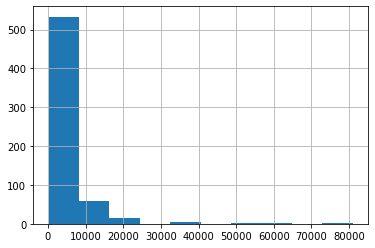

In [14]:
df['ApplicantIncome'].hist()

<AxesSubplot:>

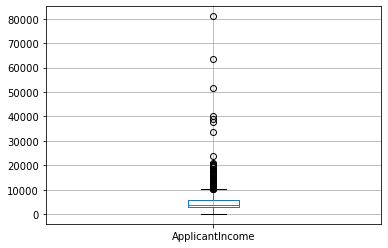

In [15]:
df.boxplot(column='ApplicantIncome')

We can see that there are outliers here however this can be due to the income disparity in the society.<br><br>

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

<Figure size 1440x576 with 0 Axes>

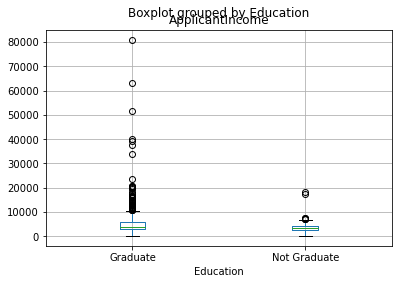

In [16]:
plt.figure(figsize=(20,8))
df.boxplot(column='ApplicantIncome', by = 'Education')

It seems that the graduates with high income are appearing as outlier here.<br.<br>

<AxesSubplot:>

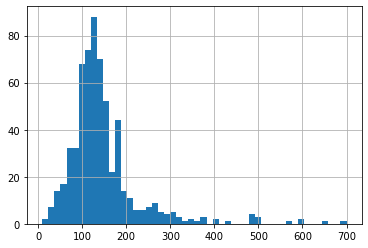

In [17]:
df['LoanAmount'].hist(bins=50)

<AxesSubplot:>

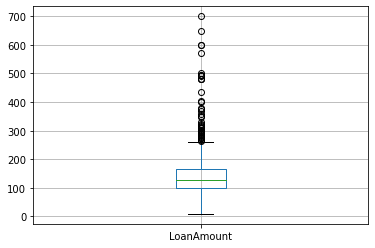

In [18]:
df.boxplot(column='LoanAmount')

<AxesSubplot:title={'center':'LoanAmount'}, xlabel='Gender'>

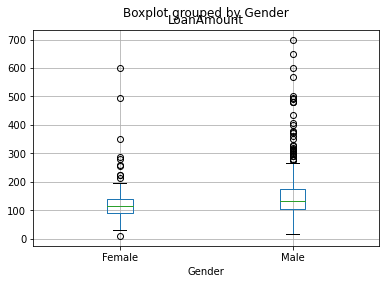

In [19]:
df.boxplot(column='LoanAmount', by = 'Gender')

We can see that there are outliers in LoanAmount. This might be because of some people applying or hive value loans.<br><br>

### Handling Outliers

Creating new column 'Total_Income' by adding 'ApplicantIncome' and 'CoapplicantIncome' columns.

In [20]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

--->LoanAmount

<AxesSubplot:>

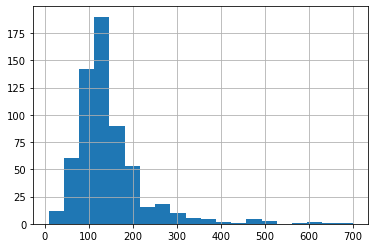

In [21]:
df['LoanAmount'].hist(bins=20)

From the above histogram, we can see that there are few loans with large amount. This is possible because, some people might have applied loans of high value.  

Instead of treating them as outlierrs, I am applying log transformation to correct the skewness in this data.

In [22]:
df['transformed_loanamt'] = np.log(df['LoanAmount'])

<AxesSubplot:>

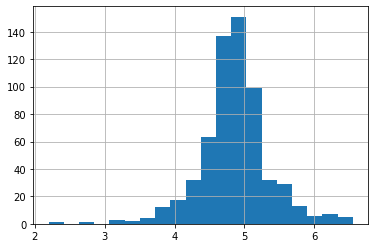

In [23]:
df['transformed_loanamt'].hist(bins=20)

--->ApplicantIncome

In [24]:
df['transformed_appinc'] = np.log(df['ApplicantIncome'])

<AxesSubplot:>

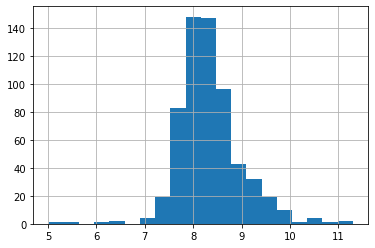

In [25]:
df['transformed_appinc'].hist(bins=20)

**Checking Skewness**

In [26]:
df['transformed_loanamt'].skew()

-0.22322704759640444

In [27]:
df['transformed_appinc'].skew()

0.4795799780016222

We can see that the skewness in these columns is corrected now.

### Data Pre-processing

**Converting categorical columns to number**

In [28]:
cat_col=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']

In [29]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [30]:
for var in cat_col:
    le = preprocessing.LabelEncoder()
    df[var]=le.fit_transform(df[var].astype('str'))
df.dtypes

Loan_ID                 object
Gender                   int32
Married                  int32
Dependents               int32
Education                int32
Self_Employed            int32
ApplicantIncome          int64
CoapplicantIncome      float64
LoanAmount             float64
Loan_Amount_Term       float64
Credit_History           int32
Property_Area            int32
Loan_Status             object
Total_Income           float64
transformed_loanamt    float64
transformed_appinc     float64
dtype: object

<br><br>---> Encoding Loan_ID and Loan_Status

* Loan_ID

In [38]:
from sklearn import preprocessing
labelencoder=preprocessing.LabelEncoder()
for column in df.columns:
    df['Loan_ID'] = labelencoder.fit_transform(df["Loan_ID"])

* Loan_Status

In [40]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [41]:
df['Loan_Status'].replace(['Y', 'N'],[1,0],inplace=True)

In [42]:
df['Loan_Status'].dtype

dtype('int64')

### Predictive Modeling

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import GridSearchCV

**Splitting data for validation**

In [44]:
X=df.drop(['Loan_Status'], axis=1)
y=df['Loan_Status']

In [45]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [46]:
print(X_train.shape, y_train.shape)

(429, 15) (429,)


**-----> Checking Accuracies**

**Logistic Regression**

In [47]:
model_log = LogisticRegression(solver='liblinear')
model_log.fit(X_train, y_train)
prediction_log = model_log.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction_log, y_test))

The accuracy of the Logistic Regression is 0.8324324324324325


**Decision Tree**

In [48]:
model_tree = DecisionTreeClassifier() 
model_tree.fit(X_train, y_train)
prediction_tree = model_tree.predict(X_test)
print('The accuracy of the Decision Tree is ', metrics.accuracy_score(prediction_tree, y_test))

The accuracy of the Decision Tree is  0.6756756756756757


**K-Nearest Neighbours(KNN)**

In [49]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
prediction_knn = model_knn.predict(X_test)
print('The accuracy of the  K-Nearest Neighbours is ', metrics.accuracy_score(prediction_knn, y_test))

The accuracy of the  K-Nearest Neighbours is  0.5783783783783784


**checking the accuracies over various values of n_neighbours.**

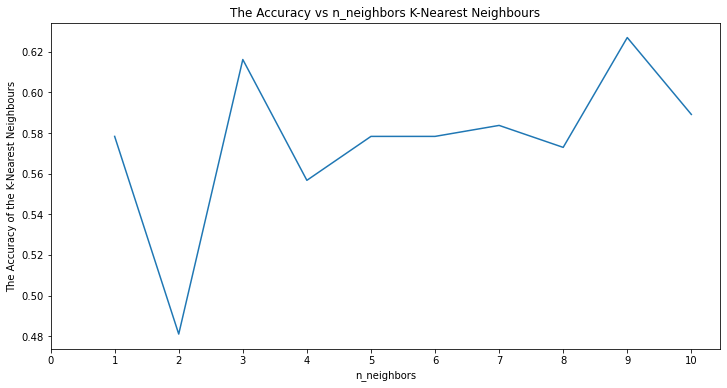

In [50]:
s =pd.Series()
for i in list(range(1,11)):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(X_train, y_train)
    prediction_knn = model_knn.predict(X_test)
    s = s.append(pd.Series(metrics.accuracy_score(prediction_knn, y_test)))

plt.plot(list(range(1,11)), s)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.title('The Accuracy vs n_neighbors K-Nearest Neighbours')
plt.xlabel('n_neighbors')
plt.ylabel('The Accuracy of the K-Nearest Neighbours')
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

**Random Forest**

In [54]:
model_random = RandomForestClassifier(n_estimators=300)
model_random.fit(X_train, y_train)
predict_random = model_random.predict(X_test)
print('The accuracy of the  Random Forest is ', metrics.accuracy_score(predict_random, y_test))

The accuracy of the  Random Forest is  0.8054054054054054


**Gaussian Naive Bayes**

In [55]:
model_gaus = GaussianNB()
model_gaus.fit(X_train, y_train)
prediction_gaus = model_gaus.predict(X_test)
print('The accuracy of the  Gaussian Naive Bayes is ', metrics.accuracy_score(prediction_gaus, y_test))

The accuracy of the  Gaussian Naive Bayes is  0.8216216216216217


**-----> Checking Cross Validation Scores**

In [56]:
from sklearn.model_selection import KFold
from  sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [57]:
kfold =KFold(n_splits=10, random_state=22)
xyz = []
accuracy = []
std = []

In [58]:
classifiers = ['Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes' , 'Random Forest']
models = [LogisticRegression(solver='liblinear'), KNeighborsClassifier(n_neighbors=9), 
      DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=300)]


models = [LogisticRegression(solver='liblinear'), KNeighborsClassifier(n_neighbors=9), 
      DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=300)]

In [59]:
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv=kfold,scoring='accuracy')
    cv_result =cv_result
    xyz.append(cv_result.mean())
    accuracy.append(cv_result)

In [60]:
models_data_frame = pd.DataFrame({'Cross Validation Score Mean': xyz}, index=classifiers)
models_data_frame

,Cross Validation Score Mean
Logistic Regression,0.806346
KNN,0.630116
Decision Tree,0.718297
Naive Bayes,0.794923
Random Forest,0.793390


**Confusion Matrix for the above models**

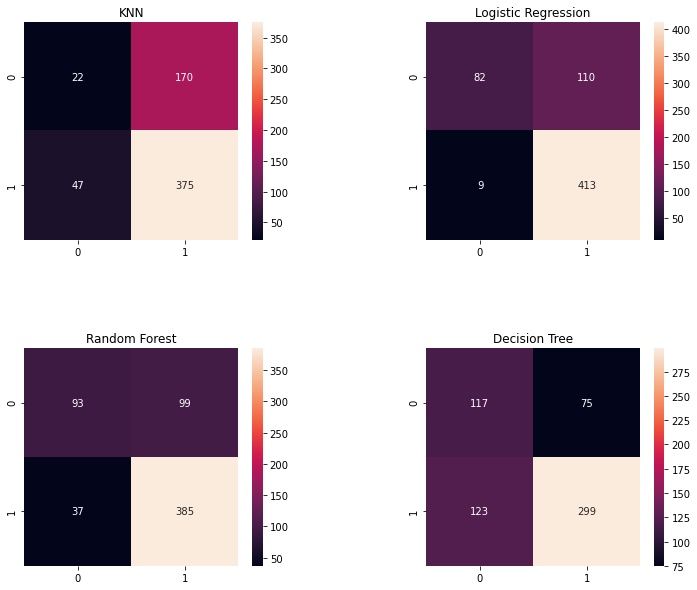

In [66]:
f, ax  =plt.subplots(2,2, figsize=(12,10))

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9) ,X,y,cv=5)
sns.heatmap(confusion_matrix(y,y_pred), ax=ax[0,0], annot=True,fmt='2.0f')
ax[0,0].set_title('KNN')

y_pred = cross_val_predict(LogisticRegression(solver='liblinear') ,X,y,cv=5)
sns.heatmap(confusion_matrix(y,y_pred), ax=ax[0,1], annot=True,fmt='2.0f')
ax[0,1].set_title('Logistic Regression')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=300) ,X,y,cv=5)
sns.heatmap(confusion_matrix(y,y_pred), ax=ax[1,0], annot=True,fmt='2.0f')
ax[1,0].set_title('Random Forest')

y_pred = cross_val_predict(DecisionTreeClassifier() ,X,y,cv=5)
sns.heatmap(confusion_matrix(y,y_pred), ax=ax[1,1], annot=True,fmt='2.0f')
ax[1,1].set_title('Decision Tree')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

Text(0.5, 1.0, 'Naive Bayes')

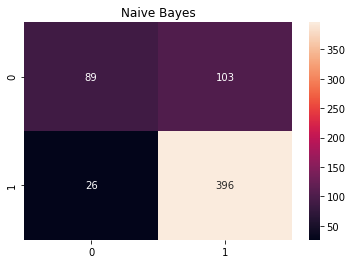

In [68]:
y_pred = cross_val_predict(GaussianNB() ,X,y,cv=5)
sns.heatmap(confusion_matrix(y,y_pred), annot=True,fmt='2.0f')
plt.title('Naive Bayes')

We can see that Logistic Regression has higher chance in predicing Loan_Status correctly.<br>
--->413 for approved and 82 for not approved predited correctly.


### ROC Curve

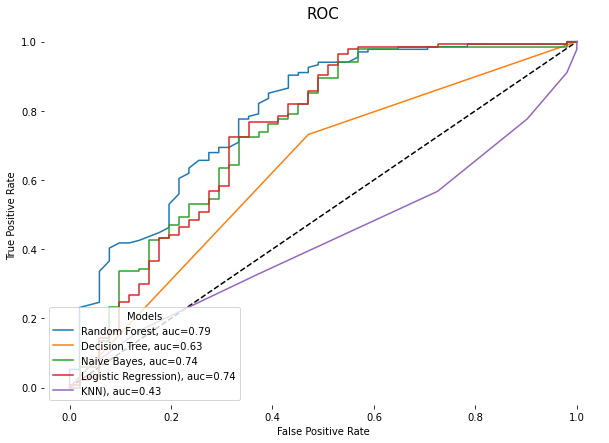

In [70]:
y_pred_proba_RF = model_random.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba_RF)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba_RF)

y_pred_proba_DT = model_tree.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba_DT)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba_DT)

y_pred_proba_NB = model_gaus.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba_NB)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba_NB)

y_pred_proba_LR = model_log.predict_proba(X_test)[::,1]
fpr4, tpr4, _ = metrics.roc_curve(y_test,  y_pred_proba_LR)
auc4 = metrics.roc_auc_score(y_test, y_pred_proba_LR)

y_pred_proba_KNN = model_knn.predict_proba(X_test)[::,1]
fpr5, tpr5, _ = metrics.roc_curve(y_test,  y_pred_proba_KNN)
auc5 = metrics.roc_auc_score(y_test, y_pred_proba_KNN)



plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Random Forest, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="Decision Tree, auc="+str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="Naive Bayes, auc="+str(round(auc3,2)))
plt.plot(fpr4,tpr4,label="Logistic Regression), auc="+str(round(auc4,2)))
plt.plot(fpr5,tpr5,label="KNN), auc="+str(round(auc5,2)))

plt.legend(loc=3, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

### Hyper Parameter Tuning

**Finding the best parameters for the three models.**

**---> Random Forest Model**

In [71]:
n_estimator =range(50, 1000, 50)
hyper = {'n_estimators': n_estimator}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:  2.8min finished


0.7866853258696522
RandomForestClassifier(n_estimators=250, random_state=0)


In [72]:
gd.best_params_

{'n_estimators': 250}

In [73]:
from sklearn.metrics import r2_score, mean_squared_error
best_reg = gd.best_estimator_
y_pred = best_reg.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)
final_rmse

0.0

**--->Logistic Regression**

In [74]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
  
logreg_cv.fit(X, y)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 2275.845926074791}
Best score is 0.7801146208183394


**--->Decision Tree Regression Model**

In [75]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [76]:
tuning_model=GridSearchCV(model_tree,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [78]:
# function for calculating how much time take for hyperparameter tuning

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        #print(thour,":",tmin,':',round(tsec,2))

In [79]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [81]:
# best hyperparameters 
tuning_model.best_params_

{'max_depth': 1,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [84]:
from sklearn.tree import DecisionTreeRegressor
tuned_hyper_model= DecisionTreeRegressor(max_depth=5,max_features='auto',max_leaf_nodes=50,min_samples_leaf=2,min_weight_fraction_leaf=0.1,splitter='random')

In [85]:
# fitting model

tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto', max_leaf_nodes=50,
                      min_samples_leaf=2, min_weight_fraction_leaf=0.1,
                      splitter='random')

In [86]:
# prediction 

tuned_pred=tuned_hyper_model.predict(X_test)

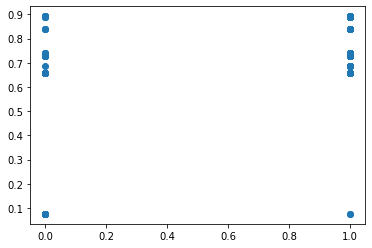

In [87]:
plt.scatter(y_test,tuned_pred)

In [90]:
# With hyperparameter tuned Decision Tree Model

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_pred)))

MAE: 0.302704246469906
MSE: 0.1478314739250123
RMSE: 0.3844885875094504


### Predictions

In [89]:
OutputDF=pd.DataFrame({'Actual Data':y_test,'Predicted Data':y_pred})
OutputDF.head()

,Actual Data,Predicted Data
454,1,1
52,0,0
536,1,1
469,0,0
55,1,1


### Saving the Model

In [91]:
import joblib

In [96]:
joblib.dump(model_tree, 'Loan_Status_Project.pkl')

['Loan_Status_Project.pkl']

In [97]:
# Load the model from the file
model_tree_from_joblib = joblib.load('Loan_Status_Project.pkl')

In [98]:
# Use the loaded model to make predictions
model_tree_from_joblib.predict(X_test)

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)